<h2> Projet Seattle

In [85]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 200)


In [86]:
#filepath_2015 = '/home/et/Mytest/my_py3/02_Seattle/input_data/2015-building-energy-benchmarking.csv'
#filepath_2016 = '/home/et/Mytest/my_py3/02_Seattle/input_data/2016-building-energy-benchmarking.csv'

filepath_2015 = '/Users/efkanturedi/Corteze/my_py3/02_Seattle/input_data/2015-building-energy-benchmarking.csv'
filepath_2016 = '/Users/efkanturedi/Corteze/my_py3/02_Seattle/input_data/2016-building-energy-benchmarking.csv'

#filepath_2015 = '/home/efkant/Corteze/my_py3/02_Seattle/input_data/2015-building-energy-benchmarking.csv'
#filepath_2016 = '/home/efkant/Corteze/my_py3/02_Seattle/input_data/2016-building-energy-benchmarking.csv'


In [87]:
data_2015 = pd.read_csv(filepath_2015)
data_2016 = pd.read_csv(filepath_2016)

In [88]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [89]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [90]:
data_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [91]:
data_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [92]:
print(data_2015.shape)
print(data_2016.shape)

(3340, 47)
(3376, 46)


In [93]:
col_2016 = list(data_2016.columns)
col_2015 = list(data_2015.columns)

In [94]:
list(set(col_2015) - set(col_2016))

['Location',
 'GHGEmissions(MetricTonsCO2e)',
 'SPD Beats',
 'OtherFuelUse(kBtu)',
 '2010 Census Tracts',
 'City Council Districts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Zip Codes',
 'Comment']

In [95]:
col_2016 = list(data_2016.columns)
col_2015 = list(data_2015.columns)
list(set(col_2016) - set(col_2015))

['Latitude',
 'Comments',
 'Address',
 'State',
 'City',
 'Longitude',
 'ZipCode',
 'GHGEmissionsIntensity',
 'TotalGHGEmissions']

In [96]:
list(set(col_2015) - set(col_2016))

['Location',
 'GHGEmissions(MetricTonsCO2e)',
 'SPD Beats',
 'OtherFuelUse(kBtu)',
 '2010 Census Tracts',
 'City Council Districts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Zip Codes',
 'Comment']

In [97]:
data_2015['TotalGHGEmissions'] = data_2015['GHGEmissions(MetricTonsCO2e)']
data_2015['GHGEmissionsIntensity'] = data_2015['GHGEmissionsIntensity(kgCO2e/ft2)']
data_2015['Comments'] = data_2015['Comment']
data_2015['ZipCode'] = data_2015['Zip Codes']
data_2015['DefaultData'] = data_2015['DefaultData'].map({'Yes' : True, 'No' : False}).head()

data_2015.drop(['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)','Comment','Zip Codes'], axis=1, inplace=True)

In [98]:
col_2016 = list(data_2016.columns)
col_2015 = list(data_2015.columns)
drop_2016 = list(set(col_2016) - set(col_2015))

In [99]:
drop_2015 = list(set(col_2015) - set(col_2016))

In [100]:
pd.DataFrame([data_2015.dtypes, data_2016.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,TotalGHGEmissions,GHGEmissionsIntensity,Comments,ZipCode,Address,City,State,Latitude,Longitude
0,int64,int64,object,object,object,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,float64,float64,float64,float64,float64,float64,object,int64,NaN,NaN,NaN,NaN,NaN
1,int64,int64,object,object,object,object,NaN,int64,object,int64,float64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,NaN,bool,object,object,NaN,NaN,NaN,NaN,float64,float64,float64,float64,object,object,object,float64,float64


In [101]:
data_2015.drop(drop_2015, axis=1, inplace=True)
data_2016.drop(drop_2016, axis=1, inplace=True)

In [102]:
col_2016 = list(data_2016.columns)
col_2015 = list(data_2015.columns)
list(set(col_2016) - set(col_2015))

[]

In [103]:
data = pd.concat([data_2015, data_2016], axis=0, sort=False)

In [104]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Comments,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,False,Compliant,NaN,249.43,2.64,NaN,18081.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,False,Compliant,NaN,263.51,2.38,NaN,18081.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,True,Compliant,NaN,2061.48,1.92,NaN,18081.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,False,Compliant,High Outlier,1936.34,31.38,NaN,18081.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,False,Compliant,NaN,507.70,4.02,NaN,19576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70,NaN,NaN
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,NaN,32.17,2.01,NaN,NaN
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,NaN,223.54,16.99,NaN,NaN
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreatio

In [105]:
data['Outlier'].isna().sum()

6600

In [106]:
data.shape

(6716, 41)

In [107]:
data.isna().sum().sum()

43541

In [108]:
data = data.reset_index(drop=True)

In [109]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Comments,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,False,Compliant,NaN,249.43,2.64,NaN,18081.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,False,Compliant,NaN,263.51,2.38,NaN,18081.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,True,Compliant,NaN,2061.48,1.92,NaN,18081.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,False,Compliant,High Outlier,1936.34,31.38,NaN,18081.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,False,Compliant,NaN,507.70,4.02,NaN,19576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70,NaN,NaN
6712,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,NaN,32.17,2.01,NaN,NaN
6713,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,NaN,223.54,16.99,NaN,NaN
6714,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreatio

In [110]:
data.drop(['Comments','ZipCode'], axis=1, inplace=True)

In [111]:
data.min()

OSEBuildingID                                       1
DataYear                                         2015
BuildingType                                   Campus
PrimaryPropertyType                College/University
PropertyName                         #4706 Bitterlake
CouncilDistrictCode                                 1
Neighborhood                                  BALLARD
YearBuilt                                        1900
NumberofBuildings                                 0.0
NumberofFloors                                    0.0
PropertyGFATotal                                11285
PropertyGFAParking                                 -3
PropertyGFABuilding(s)                         -50550
LargestPropertyUseTypeGFA                      5656.0
SecondLargestPropertyUseTypeGFA                   0.0
ThirdLargestPropertyUseTypeGFA                    0.0
ENERGYSTARScore                                   1.0
SiteEUI(kBtu/sf)                                  0.0
SiteEUIWN(kBtu/sf)          

In [112]:
data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [113]:
correct_values = {'DOWNTOWN':'Downtown', 'SOUTHEAST':'Southeast', 'NORTHEAST':'Northeast', 'EAST':'East', 'CENTRAL':'Central', 'NORTH':'North',
       'MAGNOLIA / QUEEN ANNE':'Magnolia / Queen Anne', 'LAKE UNION':'Lake Union', 'GREATER DUWAMISH':'Greater Duwamish',
       'BALLARD':'Ballard', 'NORTHWEST':'Northwest', 'SOUTHWEST':'Southwest', 'DELRIDGE':'Delridge',
       'DELRIDGE NEIGHBORHOODS':'Delridge'}

In [114]:
data['Neighborhood'].replace(correct_values, inplace=True)


In [115]:
data['Neighborhood'].unique()

array(['Downtown', 'Southeast', 'Northeast', 'East', 'Central', 'North',
       'Magnolia / Queen Anne', 'Lake Union', 'Greater Duwamish',
       'Ballard', 'Northwest', 'Southwest', 'Delridge'], dtype=object)

In [116]:
data['NumberofBuildings'].unique()

array([  1.,   7.,  11.,  16.,   4.,   3.,  39.,   2.,  10.,   6.,   0.,
        27.,  14.,   9.,   5.,  nan,   8.,  23., 111.])

In [117]:
data['NumberofBuildings'].replace({np.nan:0}, inplace=True)

In [118]:
data['NumberofBuildings'].unique()

array([  1.,   7.,  11.,  16.,   4.,   3.,  39.,   2.,  10.,   6.,   0.,
        27.,  14.,   9.,   5.,   8.,  23., 111.])

In [119]:
data['NumberofBuildings'].replace({0:1}, inplace=True)

In [120]:
data['NumberofBuildings'].unique()

array([  1.,   7.,  11.,  16.,   4.,   3.,  39.,   2.,  10.,   6.,  27.,
        14.,   9.,   5.,   8.,  23., 111.])

In [121]:
my_list = ['PropertyGFAParking','PropertyGFABuilding(s)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','Electricity(kWh)','Electricity(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity']

In [122]:
for col in my_list:
  data[col] = data[col].apply(lambda x : x if x >= 0 else 0)

In [123]:
data.min()

OSEBuildingID                                       1
DataYear                                         2015
BuildingType                                   Campus
PrimaryPropertyType                College/University
PropertyName                         #4706 Bitterlake
CouncilDistrictCode                                 1
Neighborhood                                  Ballard
YearBuilt                                        1900
NumberofBuildings                                 1.0
NumberofFloors                                    0.0
PropertyGFATotal                                11285
PropertyGFAParking                                  0
PropertyGFABuilding(s)                              0
LargestPropertyUseTypeGFA                      5656.0
SecondLargestPropertyUseTypeGFA                   0.0
ThirdLargestPropertyUseTypeGFA                    0.0
ENERGYSTARScore                                   1.0
SiteEUI(kBtu/sf)                                  0.0
SiteEUIWN(kBtu/sf)          

In [124]:
data.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
TaxParcelIdentificationNumber         2
CouncilDistrictCode                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        8
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes           136
LargestPropertyUseType              156
LargestPropertyUseTypeGFA           156
SecondLargestPropertyUseType       3478
SecondLargestPropertyUseTypeGFA    3478
ThirdLargestPropertyUseType        5560
ThirdLargestPropertyUseTypeGFA     5560
YearsENERGYSTARCertified           6487
ENERGYSTARScore                    1623
SiteEUI(kBtu/sf)                     17
SiteEUIWN(kBtu/sf)                   16


In [125]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant\n',
       'Restaurant', 'University', 'Warehouse', 'Residence Hall',
       'Supermarket / Grocery Store', 'Office'], dtype=object)

In [126]:
data.select_dtypes(['object', 'category']).nunique().sort_values(ascending=False)

PropertyName                     6527
TaxParcelIdentificationNumber    3729
ListOfAllPropertyUseTypes         488
YearsENERGYSTARCertified          116
LargestPropertyUseType             57
SecondLargestPropertyUseType       50
ThirdLargestPropertyUseType        45
PrimaryPropertyType                32
Neighborhood                       13
BuildingType                        8
ComplianceStatus                    5
Outlier                             4
DefaultData                         2
dtype: int64

In [127]:
data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']] = data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']].fillna('No Use')

In [128]:
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna('Unknown')
data['LargestPropertyUseTypeGFA'] = data['LargestPropertyUseTypeGFA'].fillna(np.mean(data['LargestPropertyUseTypeGFA']))
data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']] = data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']].fillna(np.mean(data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']]))

In [129]:
data.isna().sum().sort_values()

OSEBuildingID                         0
ComplianceStatus                      0
Electricity(kBtu)                     0
Electricity(kWh)                      0
SourceEUIWN(kBtu/sf)                  0
SourceEUI(kBtu/sf)                    0
ThirdLargestPropertyUseTypeGFA        0
TotalGHGEmissions                     0
SecondLargestPropertyUseTypeGFA       0
SecondLargestPropertyUseType          0
LargestPropertyUseTypeGFA             0
LargestPropertyUseType                0
PropertyGFABuilding(s)                0
ThirdLargestPropertyUseType           0
PropertyName                          0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyGFAParking                    0
CouncilDistrictCode                   0
GHGEmissionsIntensity                 0
PropertyGFATotal                      0
YearBuilt                             0
Neighborhood                          0
NumberofBuildings                     0


In [130]:
fuel_data = ['SiteEnergyUse(kBtu)','SiteEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','SiteEUI(kBtu/sf)','NaturalGas(kBtu)','NaturalGas(therms)','SteamUse(kBtu)']
for item in fuel_data:
  data[item] = data[item].fillna(np.mean(data[item]))

In [131]:
data.isna().sum().sort_values()

OSEBuildingID                         0
TotalGHGEmissions                     0
ThirdLargestPropertyUseTypeGFA        0
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
SecondLargestPropertyUseTypeGFA       0
SiteEnergyUse(kBtu)                   0
SteamUse(kBtu)                        0
Electricity(kWh)                      0
Electricity(kBtu)                     0
NaturalGas(therms)                    0
NaturalGas(kBtu)                      0
ComplianceStatus                      0
SiteEnergyUseWN(kBtu)                 0
SecondLargestPropertyUseType          0
ThirdLargestPropertyUseType           0
LargestPropertyUseType                0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
CouncilDistrictCode                   0
LargestPropertyUseTypeGFA             0


In [132]:
data['NumberofFloors'] = data['NumberofFloors'].fillna(np.mean(data['NumberofFloors']))

In [133]:
data.dropna(subset=['ENERGYSTARScore','TaxParcelIdentificationNumber'],inplace=True)

In [134]:
data.isna().sum().sort_values()

OSEBuildingID                         0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                       0
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
TotalGHGEmissions                     0
SiteEnergyUse(kBtu)                   0
SteamUse(kBtu)                        0
Electricity(kWh)                      0
Electricity(kBtu)                     0
NaturalGas(therms)                    0
NaturalGas(kBtu)                      0
ComplianceStatus                      0
SiteEnergyUseWN(kBtu)                 0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
LargestPropertyUseTypeGFA             0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0


In [135]:
outlier_labels = {
  np.nan:'Not abnormal',
  'High outlier':'High Outlier',
  'Low outlier':'Low Outlier'
}

In [136]:
data['Outlier'].replace(outlier_labels, inplace=True)

In [137]:
data.shape

(5092, 39)

In [138]:
data = data[data['Outlier'] != 'High Outlier']

In [139]:
data.shape

(5051, 39)

In [140]:
col_to_drop = ['ListOfAllPropertyUseTypes','DefaultData','YearsENERGYSTARCertified','Outlier']
data.drop(columns=col_to_drop,inplace=True)

/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [141]:
data.isna().sum().sum()

0

In [142]:
data.shape

(5051, 35)

In [143]:
numeric_col = data.select_dtypes(include = ['int64','float64']).columns

In [144]:
numeric_col

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [145]:
len(numeric_col)

26

In [146]:
useful_charts = [
  'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
  'PropertyGFAParking', 'PropertyGFABuilding(s)',
  'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
  'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
  'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
  'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
  'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
  'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'
]
len(useful_charts)

22

/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

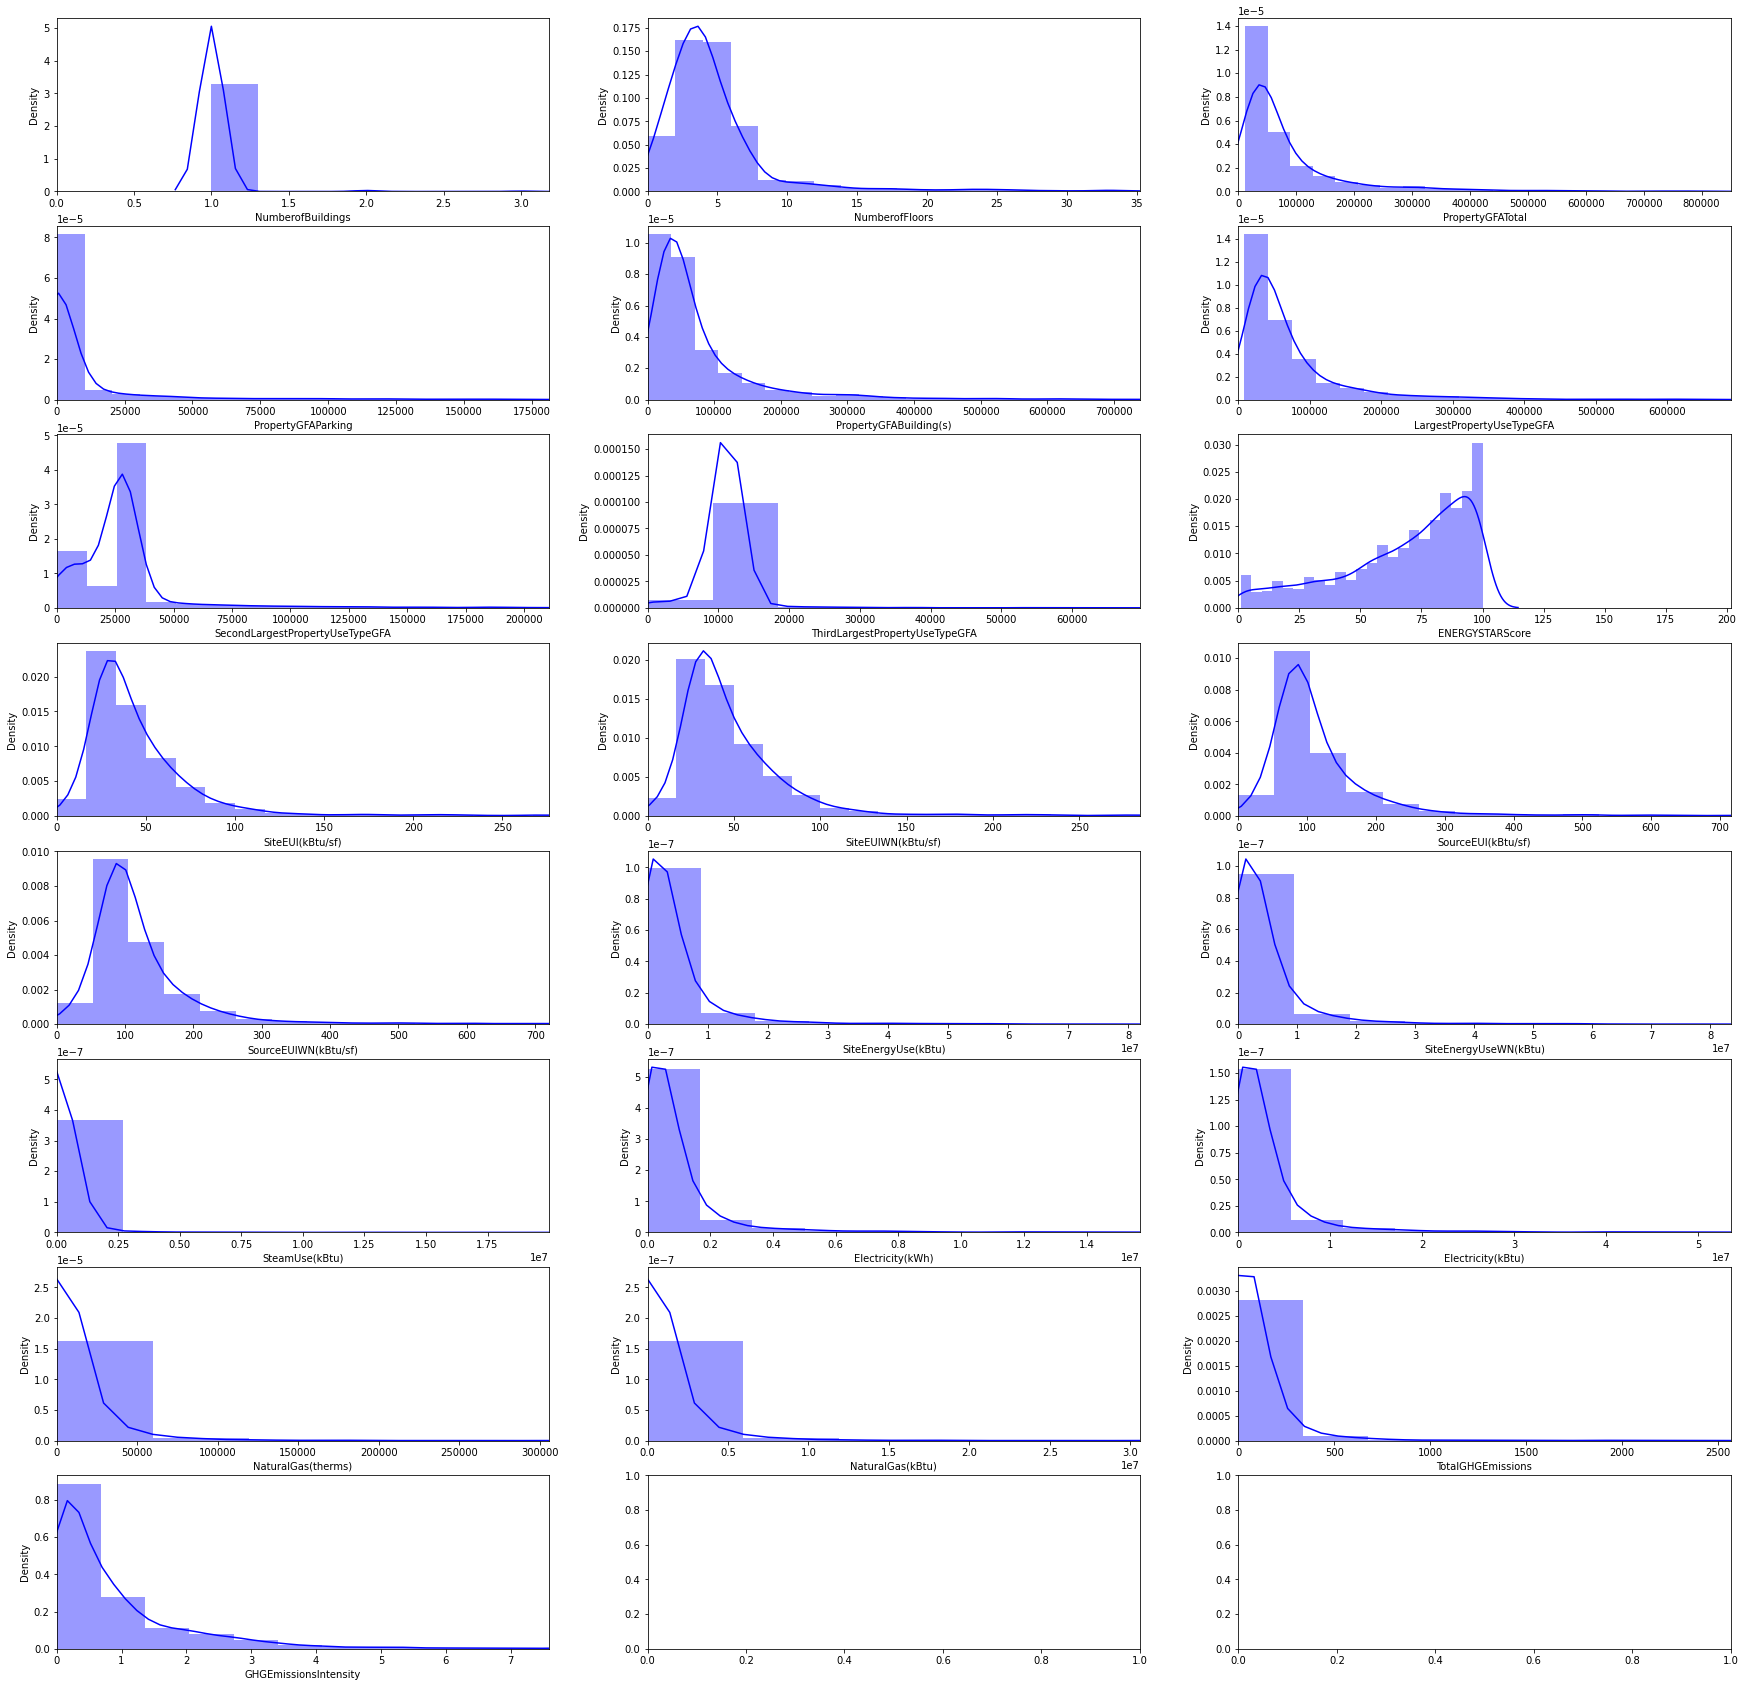

In [147]:
n_rows = 8
n_cols = 3
f, axes = plt.subplots(n_rows, n_cols, figsize=(30, 30))

ax_list = []
for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        ax_list.append(axes[row_idx,col_idx])

pointer = 0
for col in useful_charts:
    sns.distplot(data[col], color="b",ax=ax_list[pointer]);
    mean_var = np.mean(data[col])
    std_var = np.std(data[col])
    ax_list[pointer].set_xlim((0,mean_var+5*std_var))
    pointer+=1

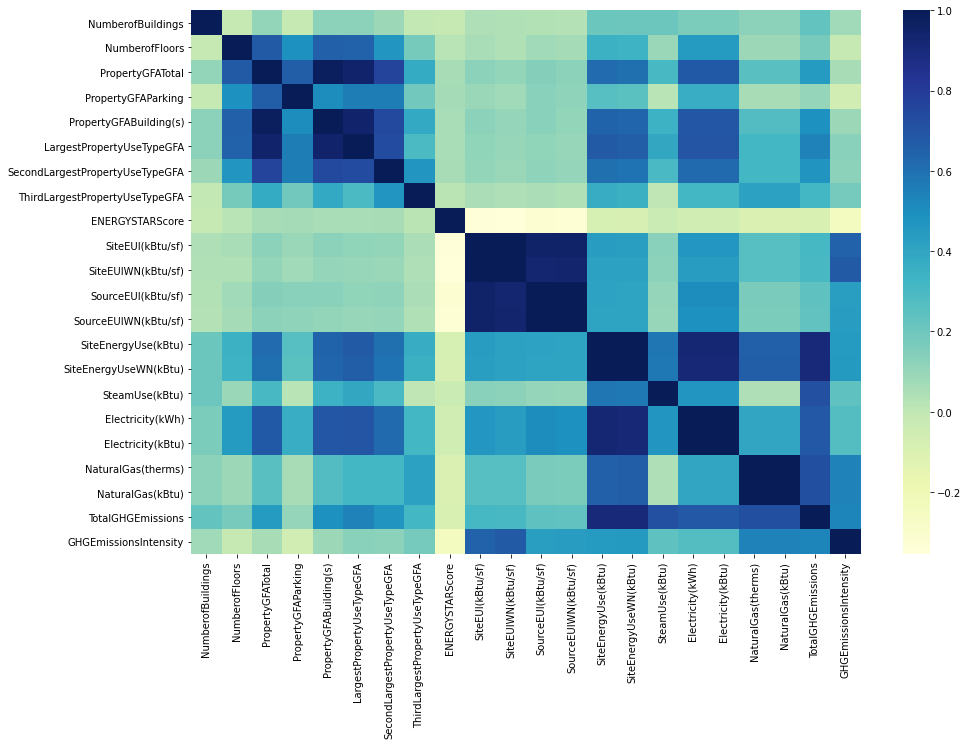

In [148]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data[useful_charts].corr(),linewidths=.0, cmap="YlGnBu",ax=ax);

In [149]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'ComplianceStatus', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [150]:
full_features = ['BuildingType', 'PrimaryPropertyType',
       'Neighborhood','NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore','SiteEnergyUseWN(kBtu)','TotalGHGEmissions']

full_features_no_es = ['BuildingType', 'PrimaryPropertyType',
       'Neighborhood','NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA',
       'SiteEnergyUseWN(kBtu)','TotalGHGEmissions']

target_features = ['SiteEnergyUseWN(kBtu)','TotalGHGEmissions']


<h2> Separation des données


In [151]:
full = data[full_features_no_es]

X = full.drop(columns=['TotalGHGEmissions','SiteEnergyUseWN(kBtu)'])
Y = full[['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']]

X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

In [152]:
Y['log-SiteEnergyUseWN(kBtu)'] = np.log(1+Y['SiteEnergyUseWN(kBtu)'])
Y['log-TotalGHGEmissions'] = np.log(1+Y['TotalGHGEmissions'])

In [153]:
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int64','float64']).columns

In [154]:
X[numerical_columns].dtypes

NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseTypeGFA     float64
dtype: object

In [155]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])

In [156]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X[categorical_columns]);

In [157]:
test_df = pd.DataFrame(columns = ohe.get_feature_names(),data = ohe.fit_transform(X[categorical_columns]))

In [158]:
test_df.reset_index(drop=True)

,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_SPS-District K-12,x1_Distribution Center,x1_Distribution Center\n,x1_High-Rise Multifamily,x1_Hospital,x1_Hotel,x1_K-12 School,x1_Large Office,x1_Low-Rise Multifamily,x1_Medical Office,x1_Mid-Rise Multifamily,x1_Mixed Use Property,x1_Non-Refrigerated Warehouse,x1_Office,x1_Other,x1_Refrigerated Warehouse,x1_Residence Hall,x1_Residence Hall/Dormitory,x1_Retail Store,x1_SPS-District K-12,x1_Self-Storage Facility\n,x1_Senior Care Community,x1_Small- and Mid-Sized Office,x1_Supermarket / Grocery Store,x1_Supermarket/Grocery Store,x1_Warehouse,x1_Worship Facility,x2_Ballard,x2_Central,x2_Delridge,x2_Downtown,x2_East,x2_Greater Duwamish,x2_Lake Union,x2_Magnolia / Queen Anne,x2_North,x2_Northeast,x2_Northwest,x2_Southeast,x2_Southwest,x3_Bank Branch,x3_Courthouse,x3_Data Center,x3_Distribution Center,x3_Financial Office,x3_Hospital (General Medical & Surgical),x3_Hotel,x3_K-12 School,x3_Laboratory,x3_Manufacturing/Industrial Plant,x3_Medical Office,x3_Multifamily Housing,x3_Non-Refrigerated Warehouse,x3_Office,x3_Other,x3_Other - Public Services,x3_Other - Restaurant/Bar,x3_Parking,x3_Refrigerated Warehouse,x3_Residence Hall/Dormitory,x3_Retail Store,x3_Self-Storage Facility,x3_Senior Care Community,x3_Supermarket/Grocery Store,x3_Unknown,x3_Wholesale Club/Supercenter,x3_Worship Facility,x4_Adult Education,x4_Bank Branch,x4_Bar/Nightclub,x4_College/University,x4_Convenience Store without Gas Station,x4_Data Center,x4_Distribution Center,x4_Financial Office,x4_Fitness Center/Health Club/Gym,x4_Food Service,x4_Hotel,x4_K-12 School,x4_Laboratory,x4_Manufacturing/Industrial Plant,x4_Medical Office,x4_Multifamily Housing,x4_No Use,x4_Non-Refrigerated Warehouse,x4_Office,x4_Other,x4_Other - Education,x4_Other - Entertainment/Public Assembly,x4_Other - Recreation,x4_Other - Restaurant/Bar,x4_Other - Services,x4_Other/Specialty Hospital,x4_Parking,x4_Performing Arts,x4_Pre-school/Daycare,"x4_Repair Services (Vehicle, Shoe, Locksmith, etc)",x4_Restaurant,x4_Retail Store,x4_Self-Storage Facility,x4_Senior Care Community,x4_Supermarket/Grocery Store,x4_Swimming Pool,x4_Worship Facility,x5_Bank Branch,x5_Bar/Nightclub,x5_College/University,x5_Convenience Store without Gas Station,x5_Data Center,x5_Distribution Center,x5_Enclosed Mall,x5_Fast Food Restaurant,x5_Financial Office,x5_Fitness Center/Health Club/Gym,x5_Food Sales,x5_Food Service,x5_Hotel,x5_Laboratory,x5_Manufacturing/Industrial Plant,x5_Medical Office,x5_Multifamily Housing,x5_No Use,x5_Non-Refrigerated Warehouse,x5_Office,x5_Other,x5_Other - Education,x5_Other - Entertainment/Public Assembly,x5_Other - Lodging/Residential,x5_Other - Public Services,x5_Other - Recreation,x5_Other - Restaurant/Bar,x5_Other - Services,x5_Other - Technology/Science,x5_Other/Specialty Hospital,x5_Parking,"x5_Personal Services (Health/Beauty, Dry Cleaning, etc)",x5_Pre-school/Daycare,x5_Refrigerated Warehouse,x5_Residence Hall/Dormitory,x5_Restaurant,x5_Retail Store,x5_Social/Meeting Hall,x5_Strip Mall,x5_Supermarket/Grocery Store,x5_Swimming Pool,x5_Worship Facility
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

In [159]:
X = pd.merge(X[numerical_columns],test_df,left_index=True,right_index=True)

In [160]:
print(X.shape)
print(Y.shape)

(5051, 160)
(5051, 4)


In [161]:
#X.to_csv('Xs.csv', index=False)
#Y.to_csv('Ys.csv', index=False)

X.to_csv('Xs_no_es.csv', index=False)
Y.to_csv('Ys_no_es.csv', index=False)

In [162]:
Y.describe()

,TotalGHGEmissions,SiteEnergyUseWN(kBtu),log-SiteEnergyUseWN(kBtu),log-TotalGHGEmissions
count,5051.000000,5.051000e+03,5051.000000,5051.000000
mean,105.872871,5.019856e+06,14.564869,3.494640
std,491.799069,1.568653e+07,1.409341,1.388053
min,0.000000,0.000000e+00,0.000000,0.000000
25%,8.755000,9.910649e+05,13.806536,2.277780
50%,30.860000,1.893665e+06,14.454025,3.461351
75%,85.070000,4.223424e+06,15.256157,4.455161
max,16870.980000,4.716139e+08,19.971671,9.733410


/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


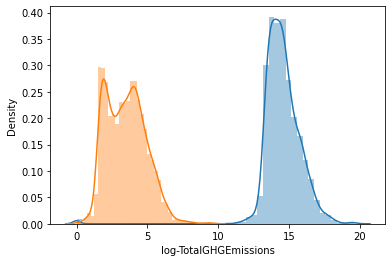

In [163]:
sns.distplot(Y['log-SiteEnergyUseWN(kBtu)']);
sns.distplot(Y['log-TotalGHGEmissions']);